 Q1) Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"/content/drive/MyDrive/Pythondataanalytics/Instacartanalysis"

In [3]:
# Importing 'ords_prods_custs_merge' data set,
ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '2) Data', 'Prepared data', 'ords_prods_custs_merge.pkl'))

In [4]:
# Checking data frame,
ords_prods_custs_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,_merge
0,198637,175298,prior,9,0,16,3.0,39812,23,0,...,Diane,Boyer,Female,Georgia,47,2/25/2018,3,married,166223,both
1,3210430,175298,prior,10,5,15,5.0,47209,11,1,...,Diane,Boyer,Female,Georgia,47,2/25/2018,3,married,166223,both
2,1111015,175298,prior,11,0,17,2.0,3957,7,1,...,Diane,Boyer,Female,Georgia,47,2/25/2018,3,married,166223,both
3,1423966,175298,prior,17,0,17,7.0,3957,6,1,...,Diane,Boyer,Female,Georgia,47,2/25/2018,3,married,166223,both
4,2333772,175298,prior,29,6,17,9.0,47672,12,0,...,Diane,Boyer,Female,Georgia,47,2/25/2018,3,married,166223,both


In [5]:
ords_prods_custs_merge.shape

(999993, 35)

Q2) If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

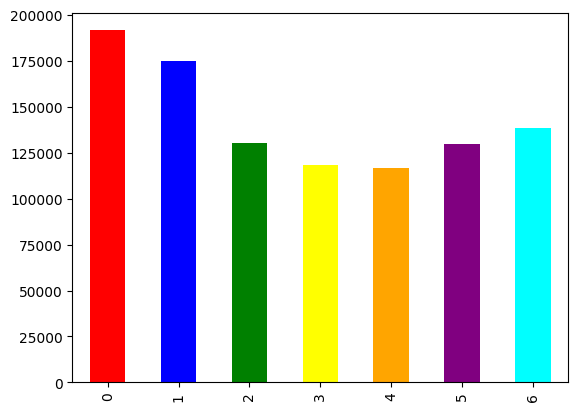

In [6]:
# Creating a bar chart, sorted, and with color,
bar = ords_prods_custs_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan'])

In [7]:
# Saving the bar chart,
bar.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'bar_orders_dow.png'))

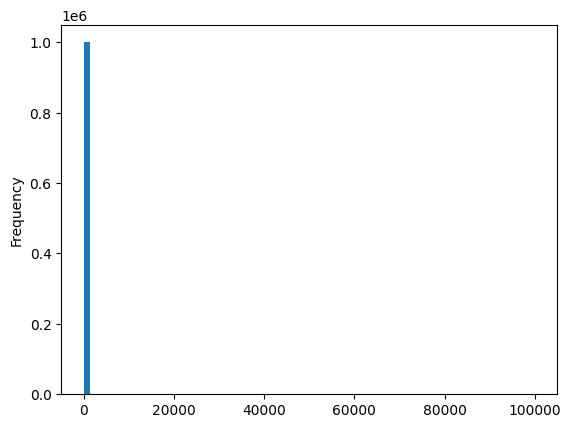

In [8]:
# Creating a histogram,
hist = ords_prods_custs_merge['prices'].plot.hist(bins = 70)

In [9]:
# Saving the histogram,
hist.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'hist_prices.png'))

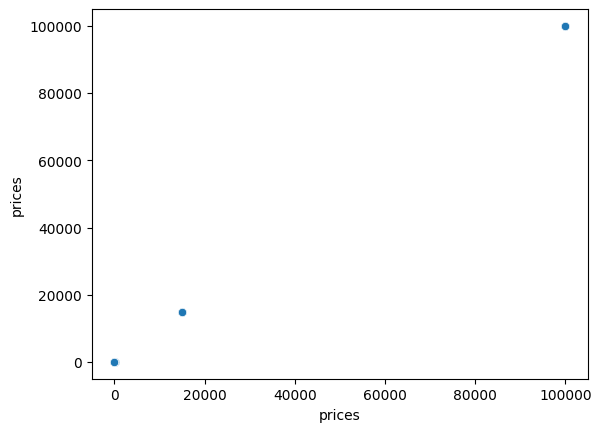

In [10]:
# Creating a scatterplot,
sctplt = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_custs_merge)

In [11]:
# Saving the scatterplot,
sctplt.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'sctplt_prices.png'))

In [12]:
# Creating a 70/30 split in the data frame to create a subset to make the line chart,
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs_merge)) <= 0.7

In [13]:
dev

array([False,  True, False, ..., False,  True,  True])

In [14]:
# Store 70% of the sample in the data frame 'big',
big = ords_prods_custs_merge[dev]

In [15]:
# Store 30% of the sample in the data frame 'small',
small = ords_prods_custs_merge[~dev]

In [16]:
# Checking then number of rows in the two sample sets,
len(ords_prods_custs_merge)

999993

In [17]:
len(big) + len(small)

999993

In [18]:
# Creating smaller data frame with only needed columns for line chart,
df_2 = small[['orders_day_of_week','prices']]

In [19]:
# Checking output of new data frame,
df_2.head()

,orders_day_of_week,prices
0,0,3.7
2,0,8.8
3,0,8.8
6,4,12.1
10,4,2.7


In [20]:
df_2.shape

(300758, 2)

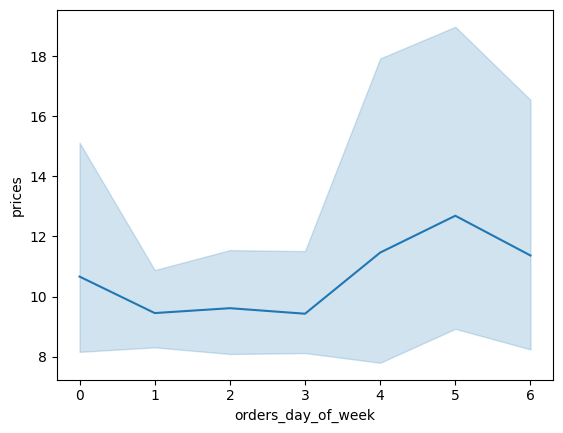

In [21]:
# Creating line chart from 'small' sample set,
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [22]:
# Saving the line chart,
line.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'line_prices_dow.png'))

Q3) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

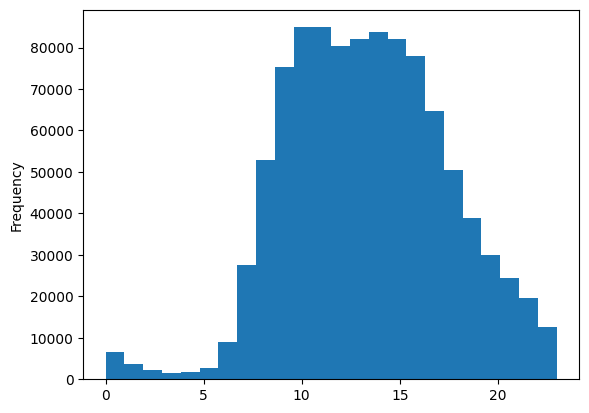

In [23]:
# Creating a histogram on 'order_hour_of_day' column using 24 bins for 24 hours in a day,
hist2 = ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24)

Above histogram demondatrates that the early morning hours (1am-7am) have very few orders. The number of orders begins to go up in the mid morning, peaking around 11am, and continues to stay high until about 5pm, when they slowly taper off again through the evening

Q4) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

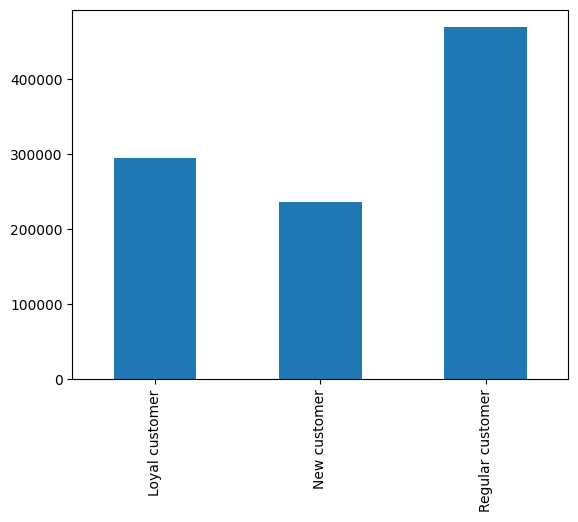

In [24]:
# Creating bar chart from 'loyalty_flag' column,
bar2 = ords_prods_custs_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

Q5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [25]:
# Creating smaller data frame with only needed columns for line chart,
df_1 = small[['order_hour_of_day','prices']]

In [26]:
# Checking output of new data frame,
df_1.head()

,order_hour_of_day,prices
0,16,3.7
2,17,8.8
3,17,8.8
6,20,12.1
10,13,2.7


In [27]:
df_1.shape

(300758, 2)

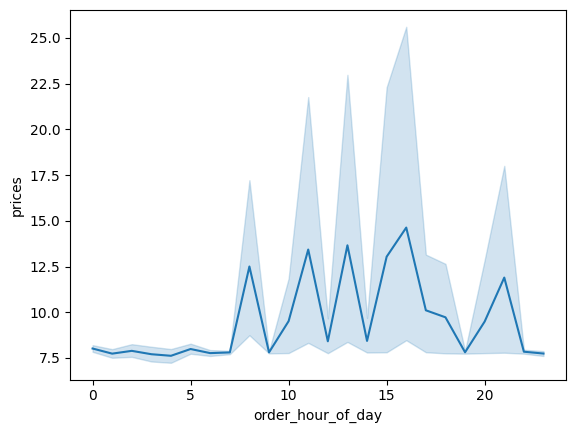

In [28]:
# Creating line chart from 'small' sample set,
line1 = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices')

Hightest priced items sell in the late evening, night time, and early morning hour. This is opposite from when the most orders are placed.

Q6) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [30]:
# Creating smaller data frame with only needed columns for line chart,
df_3 = small[['Age', 'number_of_dependants']]

In [31]:
# Checking output of new data frame,
df_3.head()

,Age,number_of_dependants
0,47,3
2,47,3
3,47,3
6,47,3
10,47,3


In [32]:
df_3.shape

(300758, 2)

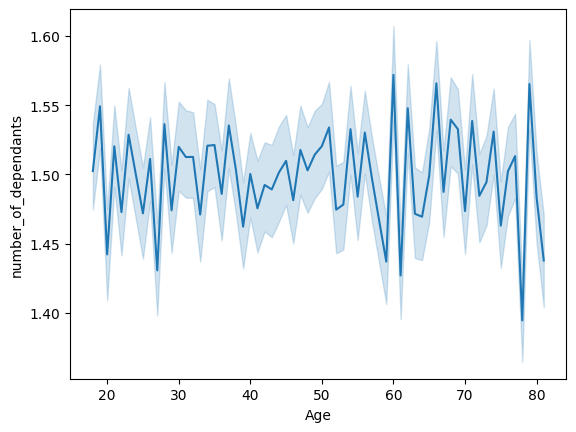

In [33]:
# Creating line chart from 'small' sample set,
line2 = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_dependants')

There does not seem to be a large difference between a customer's age and their number of dependents. Most customers, regardless of age have 1 to 2 dependents

In [ ]:
Q7) You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

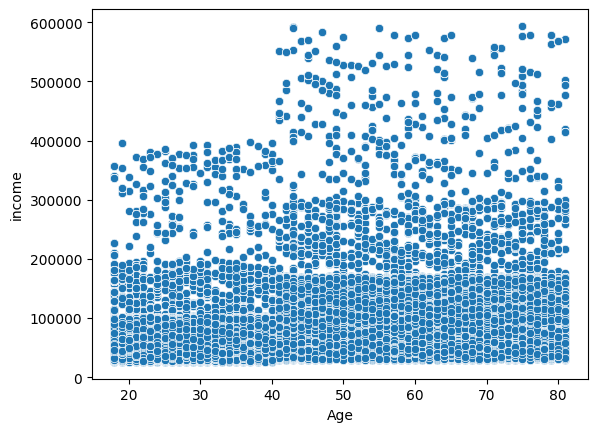

In [34]:
# Creating scatterplot of the entire merged data frame,
sctrplt2 = sns.scatterplot(x= 'Age', y = 'income', data = ords_prods_custs_merge)

The scatterplot above shows that incomes of 200,000 or less is densely and evenly distributed across all ages. Most people with incomes of 200,000 dollars to 400,000 dollars are aged 40 and less. And incomes of 400,000 to 600,000 dollars is exclusively concentrated in those aged 40 and above

Q8) Export your visualizations as “.png” files in your relevant project folder

In [36]:
# Saving the histogram (hist2),
hist2.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [37]:
# Saving bar chart (bar2),
bar2.figure.savefig(os.path.join(path, '4) Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [38]:
# Saving line graph (line1),
line1.figure.savefig(os.path.join(path, '4) Analysis', 'Visualizations', 'line_prices_by_hour.png'))

In [39]:
# Saving line graph (line2),
line2.figure.savefig(os.path.join(path, '4) Analysis', 'Visualizations', 'line_age_and_dependents.png'))

In [40]:
# Saving scatterplot (sctrplt2),
sctrplt2.figure.savefig(os.path.join(path, '4) Analysis', 'Visualizations', 'sctrplt_age_and_income.png'))

In [ ]:
Q9) Save your notebook from part 2 of this Exercise’s task.

In [41]:
ords_prods_custs_merge.to_pickle(os.path.join(path, '2) Data', 'Prepared data', 'ords_prods_custs_merge.pkl'))